# Breast Cancer Detection Using CNN

**IDC classification using keras**

In [10]:
from glob import glob
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os

In [12]:
files = glob('archive/IDC_regular_ps50_idx5/*/*/*')

In [13]:
count =0 
for file in files:
    if file[-5] == '1':
        count+=1
print(count)

78786


In [14]:
len(files)

277524

In [15]:
def show_img(files):
    plt.figure(figsize= (10,10))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        i+=1

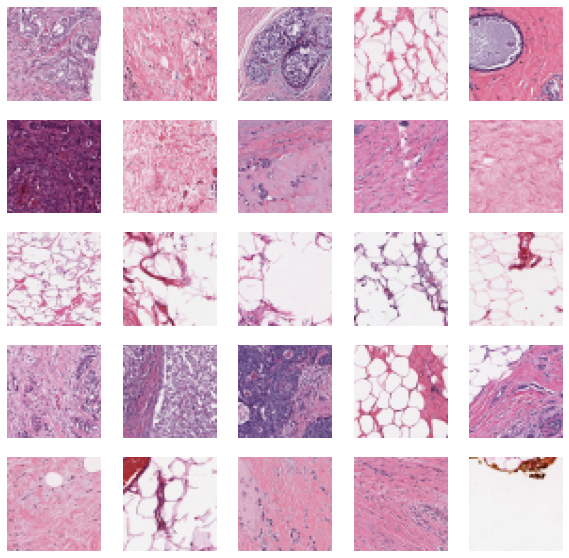

In [16]:
show_img(files)

## Handling Class Imbalance Problem 

In [17]:
def load_balanced_data(files, size, start_index):
    half_size = int(size/2)
    count=0
    res = []
    y = []
    for file in files[start_index:]:
        if (count!=half_size):
            if file[-5] == '1' and file.endswith(".png"):
                img = load_img(file, target_size = (50,50))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(1)
                count += 1
                
    for file in files[start_index:]:
        if(count!=0):
            if(file[-5] == '0'):
                img = load_img(file, target_size = (50,50))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(0)
                count -= 1
    return np.stack(res), y
    
            

In [18]:
X_train2, y_train2 = load_balanced_data(files, 90000,0)

/home/elmuser109/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

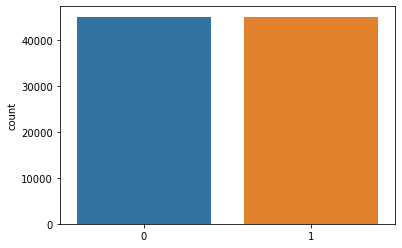

In [21]:
sns.countplot(y_train2)

In [22]:
x_test2, y_test2 = load_balanced_data(files, 20000, 100000)

/home/elmuser109/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

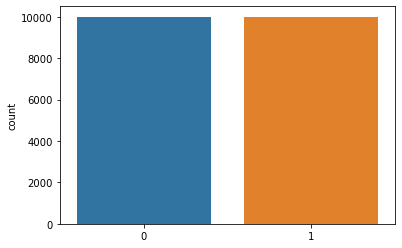

In [23]:
sns.countplot(y_test2)

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, Activation, MaxPooling2D, Flatten, BatchNormalization

In [53]:
from tensorflow.keras import optimizers

In [54]:
#Creation And Architecture of Concolutional Neural Network
def def_model(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Flatten()(m)
    m = Dense(128, activation = "relu")(m)
    out = Dense(1, activation = "sigmoid")(m)
    model = Model(inp, out)
    model.compile(optimizer = tf.keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model

In [55]:
model = def_model()

In [56]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 25, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256   

In [66]:
history = model.fit(X_train2, np.array(y_train2), validation_data=(x_test2, np.array(y_test2)), epochs = 25, batch_size=128)

Epoch 1/25
704/704 [==============================] - 121s 172ms/step - loss: 0.2873 - acc: 0.8819 - val_loss: 0.3523 - val_acc: 0.8456
Epoch 2/25
704/704 [==============================] - 122s 173ms/step - loss: 0.2774 - acc: 0.8857 - val_loss: 0.3438 - val_acc: 0.8592
Epoch 3/25
704/704 [==============================] - 119s 169ms/step - loss: 0.2700 - acc: 0.8895 - val_loss: 0.4573 - val_acc: 0.7865
Epoch 4/25
704/704 [==============================] - 107s 151ms/step - loss: 0.2620 - acc: 0.8921 - val_loss: 0.3351 - val_acc: 0.8650
Epoch 5/25
704/704 [==============================] - 108s 153ms/step - loss: 0.2505 - acc: 0.8977 - val_loss: 0.3318 - val_acc: 0.8625
Epoch 6/25
704/704 [==============================] - 107s 151ms/step - loss: 0.2394 - acc: 0.9037 - val_loss: 0.3080 - val_acc: 0.8695
Epoch 7/25
704/704 [==============================] - 106s 151ms/step - loss: 0.2319 - acc: 0.9058 - val_loss: 0.3307 - val_acc: 0.8533
Epoch 8/25
704/704 [============================

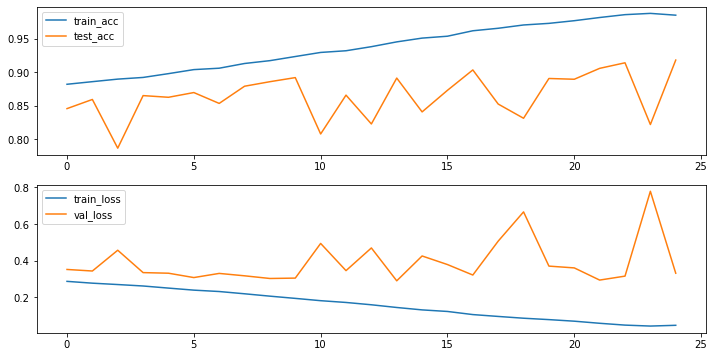

In [68]:
#plot the accuracy graph
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history.history['acc'], label="train_acc")
plt.plot(history.history['val_acc'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

**Trying Dropout and Data Augmentation**

In [26]:
def def_model2(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(256, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)

    m = Dropout(0.2)(m)
    m = Flatten()(m)

    m = Dense(128, activation = "relu")(m)
    out = Dense(1, activation = "sigmoid")(m)
    model = Model(inp, out)
    model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model

In [27]:
model2 = def_model2()

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
#Using ImageDataGenerator To Generate similar images
datagen = ImageDataGenerator(height_shift_range=0.2,
                            width_shift_range=0.2,
                            zoom_range=0.2,
                            shear_range=0.2)

In [30]:
train_generator = datagen.flow(X_train2, y_train2, batch_size=256)
val_generator = datagen.flow(x_test2, y_test2, batch_size=256)

In [31]:
#Training The Model using train_generator and val_generator
history2 = model2.fit(train_generator, validation_data=val_generator, epochs = 15)

Epoch 1/15
352/352 [==============================] - 321s 912ms/step - loss: 0.5996 - acc: 0.6876 - val_loss: 0.5362 - val_acc: 0.8135
Epoch 2/15
352/352 [==============================] - 317s 900ms/step - loss: 0.5102 - acc: 0.7650 - val_loss: 0.3541 - val_acc: 0.8250
Epoch 3/15
352/352 [==============================] - 319s 907ms/step - loss: 0.4853 - acc: 0.7792 - val_loss: 0.4167 - val_acc: 0.8314
Epoch 4/15
352/352 [==============================] - 320s 910ms/step - loss: 0.4688 - acc: 0.7867 - val_loss: 0.3516 - val_acc: 0.8384
Epoch 5/15
352/352 [==============================] - 317s 901ms/step - loss: 0.4636 - acc: 0.7906 - val_loss: 0.4030 - val_acc: 0.8391
Epoch 6/15
352/352 [==============================] - 318s 903ms/step - loss: 0.4526 - acc: 0.7963 - val_loss: 0.2811 - val_acc: 0.8282
Epoch 7/15
352/352 [==============================] - 318s 904ms/step - loss: 0.4432 - acc: 0.8002 - val_loss: 0.2091 - val_acc: 0.8380
Epoch 8/15
352/352 [============================

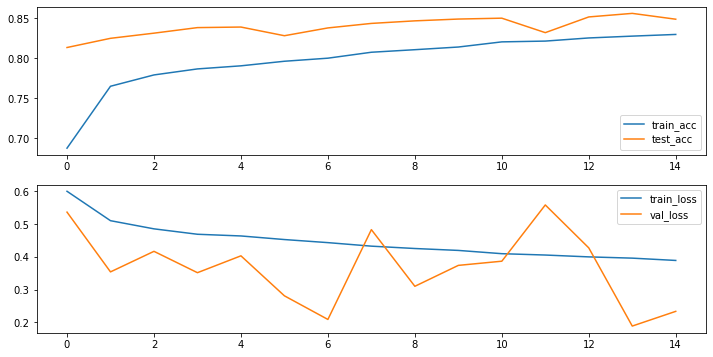

In [32]:
#plot accuracy and loss graph
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history2.history['acc'], label="train_acc")
plt.plot(history2.history['val_acc'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history2.history['loss'], label = "train_loss")
plt.plot(history2.history['val_loss'], label = "val_loss")
plt.legend()

In [69]:
#Testing The CNN Model
pred = model.predict(x_test2)

In [70]:
#Classification To check wether IDC or Not IDC
res = []
for prediction in pred:
    if(prediction > 0.5):
        res.append(1)
    else:
        res.append(0)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
#Final Classification Report using Confusion Matrix
print(confusion_matrix(y_test2, res))
print(classification_report(y_test2, res))

[[8855 1145]
 [ 496 9504]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     10000
           1       0.89      0.95      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



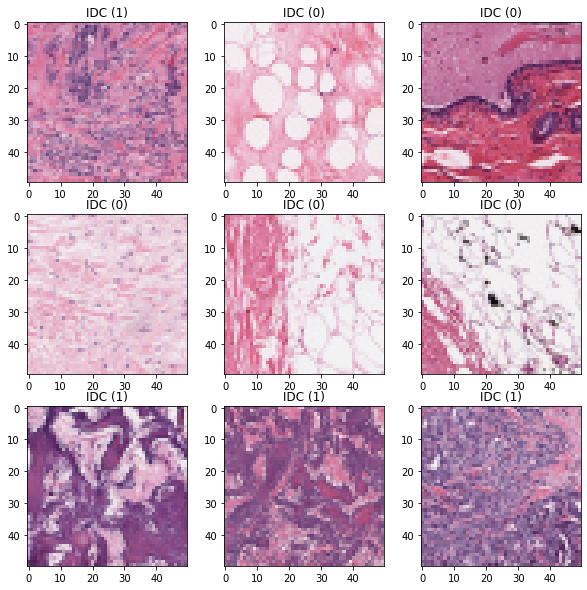

In [72]:

plt.figure(figsize= (10,10))
ind = np.random.randint(0, len(pred), 9)
i=0
#The patient having IDC is represented by IDC 1 ,IDC 0 otherwise.
for loc in ind:
    plt.subplot(3,3,i+1)
    plt.xlabel(None)
    plt.title("IDC ({})".format(res[loc]))
        
    plt.imshow(x_test2[loc])
    i+=1

In [73]:
model.save('models/')

2021-11-04 14:52:06.901839: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/assets
